# Evaluation of different models and Prediction on whether a client agree to join the new bank deposit product

## A. Classification Modelling Requirement 

### MLMaverick Team
- Seulah Lee 300361747
- David Steven Salazar Villegas 300356922
- Ishwinder Singh 300351938

### 2.  Importing pandas libraries and csv file for further operations

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank-sampled-9k.csv',index_col=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no


### 3. PreProcessing and Removing outliers

In [2]:
condition = df.poutcome == 'other'
df_cleaned = df.drop(df[condition].index, axis = 0, inplace = False)

df_cleaned[['job','education']] = df_cleaned[['job','education']].replace(['unknown'],'other')
print(df_cleaned.shape)


from scipy.stats import zscore

df_cleaned[['balance']].mean()
df_cleaned[['balance']].mean()

df_cleaned['balance_outliers'] = df_cleaned['balance']
df_cleaned['balance_outliers']= zscore(df_cleaned['balance_outliers'])

condition1 = (df_cleaned['balance_outliers']>3) | (df_cleaned['balance_outliers']<-3 )
df_cleaned = df_cleaned.drop(df_cleaned[condition1].index, axis = 0, inplace = False)
df_cleaned = df_cleaned.drop('balance_outliers', axis=1)
print(df_cleaned.shape)

(8647, 17)
(8524, 17)


### Dropping duration column and merging data of `date` and `day` columns into `last_contact`

In [3]:
df_cleaned.drop('duration',axis=1,inplace=True)

from datetime import datetime as dt

last_date = "18 Nov, 2010"
dt_1 = dt.strptime(last_date, "%d %b, %Y")

df_cleaned['month'] = df_cleaned['month'].apply(lambda x: x.capitalize())
df_cleaned['date'] = df_cleaned['day'].astype(str) + " " + df_cleaned['month'] + ", 2010"

df_cleaned['last_contact'] = df_cleaned['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)

df_cleaned.drop(columns=['day', 'date', 'month'], axis=1, inplace=True)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
18,60,retired,married,primary,no,60,yes,no,unknown,5,may,219,1,-1,0,unknown,no
24,40,retired,married,primary,no,0,yes,yes,unknown,5,may,181,1,-1,0,unknown,no
38,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,no
40,44,services,divorced,secondary,no,2586,yes,no,unknown,5,may,160,1,-1,0,unknown,no
50,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown,no


### Display the summary statistics of the dataset

In [4]:
df_cleaned.describe()

,age,balance,campaign,pdays,previous,last_contact
count,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000
mean,41.045753,1080.669052,2.786954,32.301267,0.436415,149.692985
std,10.523894,1715.537388,3.061747,90.824835,1.630640,73.372969
min,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000
25%,33.000000,63.000000,1.000000,-1.000000,0.000000,105.000000
50%,39.000000,430.000000,2.000000,-1.000000,0.000000,166.000000
75%,49.000000,1363.250000,3.000000,-1.000000,0.000000,191.000000
max,90.000000,11115.000000,51.000000,792.000000,55.000000,316.000000


In [5]:
df_cleaned.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
last_contact     int64
dtype: object

### Dummy variable creation for categorical columns

- Used a new variable prefix to store the column name and used a for loop to iterate over all the object datatypes
- After that appended each of dummy variable to the prefix. used a valid name for each column 
- changed any appearance of hypen ‘-‘ with underscore ‘_’

In [6]:
categorical_columns = df_cleaned.select_dtypes('object').columns
dummy_dfs = []

for column in categorical_columns:
    prefix = column
    dummies = pd.get_dummies(df_cleaned[column], prefix=prefix, drop_first=True)
    dummies.columns = dummies.columns.map(lambda x: x.replace('-', '_'))
    dummies = dummies.astype(int)
    dummy_dfs.append(dummies)
    df_cleaned.drop(column, axis=1, inplace=True)

df_cleaned = pd.concat([df_cleaned] + dummy_dfs, axis=1)

print(df_cleaned)

       age  balance  campaign  pdays  previous  last_contact  job_blue_collar  \
0       58     2143         1     -1         0           197                0   
2       33        2         1     -1         0           197                0   
11      29      390         1     -1         0           197                0   
12      53        6         1     -1         0           197                0   
17      57       52         1     -1         0           197                1   
...    ...      ...       ...    ...       ...           ...              ...   
45196   25      358         1     -1         0             2                0   
45201   53      583         1    184         4             1                0   
45204   73     2850         1     40         8             1                0   
45206   51      825         3     -1         0             1                0   
45207   71     1729         2     -1         0             1                0   

       job_entrepreneur  jo

### 4. Feature Selection and Scaling
- Logistic Regression with max interation to use estimator for threshold

In [7]:
## Dropping the target variable to make a features array
X = df_cleaned.drop('y_yes', axis=1)
y = df_cleaned['y_yes']
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [8]:
method_logreg = SelectFromModel(estimator=LogisticRegression(max_iter=5000)) 
method_logreg.fit(X, y)

pd.DataFrame({'coef': method_logreg.estimator_.coef_[0], 
            'select_feature' : method_logreg.get_support()}, 
             index=X.columns)

,coef,select_feature
age,-0.005312,False
balance,0.000081,False
campaign,-0.121232,False
pdays,-0.001980,False
previous,0.028989,False
last_contact,0.001132,False
job_blue_collar,0.006223,False
job_entrepreneur,-0.212416,False
job_housemaid,-0.303468,True
job_management,-0.221429,False


### Scaling features and then checking shape of feature array

In [9]:
method_logreg.threshold_
method_logreg.get_support()
X_2 = method_logreg.transform(X)
X_2.shape

## X_2 is the feature array selected with 7 features.

(8524, 8)

### Feature Selection using Support Vector Machines  hyperparameter value 0.001

In [10]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svm = LinearSVC(C=0.001, penalty='l1', dual=False)
svm.fit(X, y)

model_svm = SelectFromModel(svm, prefit=True)
selected_features_svm = model_svm.get_support(indices=True)
X_selected_svm = model_svm.transform(X)

print("Selected Features using Linear SVM:")
print(selected_features_svm)
print(X_selected_svm.shape)



df = pd.DataFrame(X_selected_svm, columns=selected_features_svm)


df.to_csv("feature1.csv", index=False) 
## selected_features_svm is the feature selection array for svm

Selected Features using Linear SVM:
[ 0  1  2  3  5 23]
(8524, 6)


C:\Users\D\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Feature Selection using Select K Best  

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)


selected_feature_k = selector.get_support(indices=True)
model_svm = SelectFromModel(svm, prefit=True)
X_selected_svm = model_svm.transform(X)

print("Selected Features using Linear SVM:")
print(X_selected_svm.shape) 

selected_columns_k = X.columns[selected_feature_k];
print("Selected Features using SelectKBest with mutual_info_classif:")
print(selected_feature_k)


## selected_columns_k is the feature selection array for selectk best 

Selected Features using Linear SVM:
(8524, 6)
Selected Features using SelectKBest with mutual_info_classif:
[ 0  1  2  3  5  7 23 26 27 28]


C:\Users\D\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### 5. Classifier Modelling

### Divide the dataset into training and test sets with ratio 75:25

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected_svm, y, test_size=0.25, random_state=42)

### Import classifiers needed
- Naïve Bayes classifier
- KNN
- Decision tree classifier
- Random forest classifier

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Using a pipeline to implement the classifier models with cross-validation and calculate the mean value 

In [14]:
# An array with the name of the classifiers used
names = ["Naive Bayes", "Nearest Neighbors", "Decision Tree", "Random Forest"]

# An array that will hold the mean scores of each classifier
scores_mean = []

# Definning the k-fold cross-validation parameter
kfold = KFold(n_splits = 5)

classifiers =[
    GaussianNB(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100, max_depth=5)
]

for classifier in classifiers:
    pipeline = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('classifier', classifier)
        ])
    print(classifier)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold)
    print("Scores: ", scores)
    print("Scores mean: ", scores.mean())
    scores_mean.append(scores.mean())
    

GaussianNB()
Scores:  [0.85770133 0.85770133 0.83893667 0.85211268 0.83333333]
Scores mean:  0.8479570673978717
KNeighborsClassifier(n_neighbors=3)
Scores:  [0.8663018  0.88193901 0.86317435 0.87167449 0.86619718]
Scores mean:  0.8698573685182941
DecisionTreeClassifier(max_depth=5)
Scores:  [0.87881157 0.89210321 0.87646599 0.88262911 0.88262911]
Scores mean:  0.8825277964372106
RandomForestClassifier(max_depth=5)
Scores:  [0.88115715 0.90148554 0.88350274 0.885759   0.88654147]
Scores mean:  0.8876891791195438


In [15]:
best_classifier_index = np.argmax(scores_mean)
best_classifier_name = names[best_classifier_index]

print(f"The best classifier is: {best_classifier_name}")

The best classifier is: Random Forest


### Displaying the mean accuracy scores in a list 

In [16]:
scores_df = pd.DataFrame(zip(names, scores_mean), \
                         columns=['Classifier', 'Accuracy'])
scores_df

,Classifier,Accuracy
0,Naive Bayes,0.847957
1,Nearest Neighbors,0.869857
2,Decision Tree,0.882528
3,Random Forest,0.887689


### Getting the best mean accuracy from the scores_mean array

In [17]:
print("Best mean accuracy score from the training dataset:", max(scores_mean))

#Select Random Forest as it has the best mean -> 0.887846

Best mean accuracy score from the training dataset: 0.8876891791195438


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler
import pandas as pd
import joblib

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(estimator=rf, max_features=10)  # Change 'max_features' as desired
X_selected_rf = selector.fit_transform(X, y)
scaler = RobustScaler()

X_scaled = scaler.fit_transform(X_selected_rf)

joblib.dump(scaler, 'robust_scaler_model.pkl')


selected_features_df = pd.DataFrame(X_scaled, columns=[f"feature_{i}" for i in range(X_selected_rf.shape[1])])

selected_features_df.to_csv("feature2.csv", index=False)

### 6.  Using classifier on new feature2

In [20]:
X_train_f2, X_test_f2, y_train_f2, y_test_f2 = train_test_split(selected_features_df, y, test_size=0.25, random_state=42)


nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

pipelines = [
    ('NB', Pipeline([('scaler', RobustScaler()), ('clf', nb_classifier)])),
    ('KNN', Pipeline([('scaler', RobustScaler()), ('clf', knn_classifier)])),
    ('DecisionTree', Pipeline([('scaler', RobustScaler()), ('clf', dt_classifier)])),
    ('RandomForest', Pipeline([('scaler', RobustScaler()), ('clf', rf_classifier)]))
]

score_mean_f2 = []
cv_scores = []

for name, pipeline in pipelines:
    kfold = KFold(n_splits=4, shuffle=True, random_state=42)  # You can change the number of splits here
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append((name, np.mean(cv_results)))
    
    
best_classifier_f2 = max(cv_scores, key=lambda x: x[1])[0]

print("Mean Cross-Validation Scores:")
for name, mean_score in cv_scores:
    print(f"{name}: {mean_score}")
    score_mean_f2.append(mean_score)

print(f"\nThe best classifier is: {best_classifier_f2}")



Mean Cross-Validation Scores:
NB: 0.8473341833639767
KNN: 0.8789313917255857
DecisionTree: 0.8382592648252467
RandomForest: 0.8900358954008333

The best classifier is: RandomForest


In [21]:
scores_df2 = pd.DataFrame(zip(names, score_mean_f2), \
                         columns=['Classifier', 'Accuracy'])

print("Accuracy for First Try")
print(scores_df)

print("Accuracy for second Try")
print(scores_df2)


print("Number of features for first Try - 6")
print("Number of features for Second Try -5")

Accuracy for First Try
          Classifier  Accuracy
0        Naive Bayes  0.847957
1  Nearest Neighbors  0.869857
2      Decision Tree  0.882528
3      Random Forest  0.887689
Accuracy for second Try
          Classifier  Accuracy
0        Naive Bayes  0.847334
1  Nearest Neighbors  0.878931
2      Decision Tree  0.838259
3      Random Forest  0.890036
Number of features for first Try - 6
Number of features for Second Try -5


## 7. Model Evaluation ROC curve

### Accuracy of the model in the test set 

In [24]:
rf_classifier.fit(X_train_f2, y_train_f2)
acc_test_set = rf_classifier.score(X_test_f2, y_test_f2)

print('Accuracy on Test Set:', acc_test_set)

Accuracy on Test Set: 0.8939465039887377


### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

Y_pred = rf_classifier.predict(X_test_f2)

conf_matrix = confusion_matrix(y_test_f2, Y_pred)


<Axes: xlabel='Predicted', ylabel='Actual'>

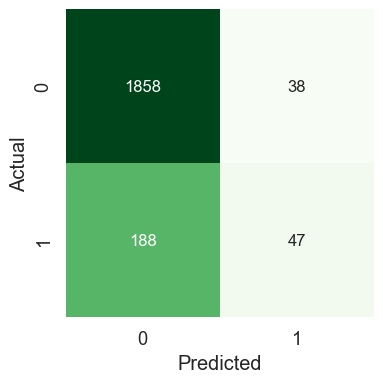

In [39]:
#Generate seaborn heatmap for the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_test_f2), index = np.unique(y_test_f2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=300, square=True, fmt="d", cmap="Greens")

### Classification report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test_f2, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1896
           1       0.55      0.20      0.29       235

    accuracy                           0.89      2131
   macro avg       0.73      0.59      0.62      2131
weighted avg       0.87      0.89      0.87      2131



### ROC curve

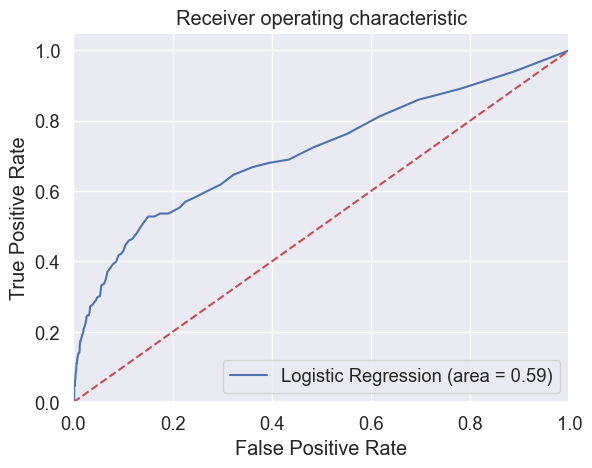

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test_f2, rf_classifier.predict(X_test_f2))
fpr, tpr, thresholds = roc_curve(y_test_f2, rf_classifier.predict_proba(X_test_f2)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### TODO: Analysis
You should see that the number of false negative is quite big. It is easier for the classifier to determine
the rejection (class 0), than to predict that the client will sign into the new banking product. Provide
your insights on the possible cause or a way to improve our classifier performance

## Member Contribution Matrix
|Cont| Ishu | Seu | David |
|---|---|---|---|
| Ishu|x|2|4|
| Seu| 4|x|4|
| David |4|4|x|